In [1]:
import requests, json, datetime, random, string
import security

f = open(f"logs/log-{datetime.datetime.now().strftime('%Y-%m-%d %H-%M-%S')}.txt", "w")
instructionsMap = {True: "Your objective is to solve a series of simple math additions. Answer them correctly with the result of the provided calculation as a number, do not output any data besides the result.",
                   False: "Solve math additions"}
demo = False
showCalcs = False


In [2]:
def generate(model:str, prompt:str, advancedInstructions: bool) -> string:
    url = f"https://api.cloudflare.com/client/v4/accounts/{security.account_id}/ai/run/{model}"
    headers = {
        "Authorization": security.token
    }
    messages = {
        "max_tokens": 8,
        "messages": [
            {"role": "system", "content": instructionsMap[advancedInstructions]},
            { "role": "user", "content": "2726 + 3562 ="},
            { "role": "assistant", "content": "6288"},
            { "role": "user", "content": "4850 + 7944 ="},
            { "role": "assistant", "content": "12794"},
            { "role": "user", "content": "8405 + 5663 = "},
            { "role": "assistant", "content": "14068"},
            { "role": "user", "content": prompt}
        ]
    }
    rJson = requests.post(url=url, headers=headers, json=messages).json()
    f.write(json.dumps(rJson, indent=4) + "\n")
    if not rJson["success"]: return False
    output = "".join(filter(lambda x: x in string.digits+' ',
                            rJson["result"]["response"])).strip().split(" ")[0]
    #output = rJson["result"]["response"].strip().split(" ")[0].split("\n")[0]
    #print(json.dumps(rJson, indent=3), '\n')
    #print(rJson["result"]["response"])
    
    return output

In [3]:
models = [
          ("@cf/meta/llama-3-8b-instruct", "Llama 3", False),
          ("@cf/mistral/mistral-7b-instruct-v0.1", "Mistral", False),
          ("@hf/google/gemma-7b-it", "Gemma", False),
          ("@cf/qwen/qwen1.5-14b-chat-awq", "Qwen", False),
          ("@hf/nexusflow/starling-lm-7b-beta", "Starling", False),
          ("@hf/thebloke/zephyr-7b-beta-awq", "Zephyr", False)
         ]
          
quant = 5 # Quantidade de cálculos

matchMap = {True: "✅", False: "❌"}

calcs = [(random.randint(0, 100000), random.randint(0, 100000)) for i in range(quant)]
print("""Avaliação automatizada de precisão de modelos de linguagem em somas matemáticas simples.
Programado por Augusto Vargas.""")

if showCalcs:
    print("Lista de cálculos:")
    for i in calcs:
        print(f"{i[0]} + {i[1]}")

Avaliação automatizada de precisão de modelos de linguagem em somas matemáticas simples.
Programado por Augusto Vargas.


In [4]:
def trial(model: tuple) -> tuple:
    print("modelo:", model[1])
    matches = 0 # Acertos
    errors = 0 # Erros
    
    for i, calc in enumerate(calcs):
        
        prompt = f"{calc[0]} + {calc[1]} ="
        if showCalcs: print(f"{i+1}: {prompt}", end=" ")
    
        response = generate(model=model[0], prompt=prompt, advancedInstructions=model[2])
        while not response:
            errors+=1
            response = generate(model=model[0], prompt=prompt, advancedInstructions=model[2])

        validity = int(response) == calc[0] + calc[1]
        matches += validity

        if showCalcs: print(response, matchMap[validity], f"({calc[0]+calc[1]})"*(not validity))
        
    print(f"""
Resultados:
  Modelo: {model[1]}
  Cálculos realizados: {quant}
  Acertos: {matches}
  Erros: {quant-matches}
  Falhas de execução: {errors}
""")
    return (matches, model[1], errors)

In [5]:
results = []

for model in models:
    results.append(trial(model))

modelo: Llama 3

Resultados:
  Modelo: Llama 3
  Cálculos realizados: 5
  Acertos: 4
  Erros: 1
  Falhas de execução: 0

modelo: Mistral

Resultados:
  Modelo: Mistral
  Cálculos realizados: 5
  Acertos: 1
  Erros: 4
  Falhas de execução: 0

modelo: Gemma

Resultados:
  Modelo: Gemma
  Cálculos realizados: 5
  Acertos: 3
  Erros: 2
  Falhas de execução: 0

modelo: Qwen

Resultados:
  Modelo: Qwen
  Cálculos realizados: 5
  Acertos: 4
  Erros: 1
  Falhas de execução: 0

modelo: Starling

Resultados:
  Modelo: Starling
  Cálculos realizados: 5
  Acertos: 5
  Erros: 0
  Falhas de execução: 0

modelo: Zephyr

Resultados:
  Modelo: Zephyr
  Cálculos realizados: 5
  Acertos: 4
  Erros: 1
  Falhas de execução: 0



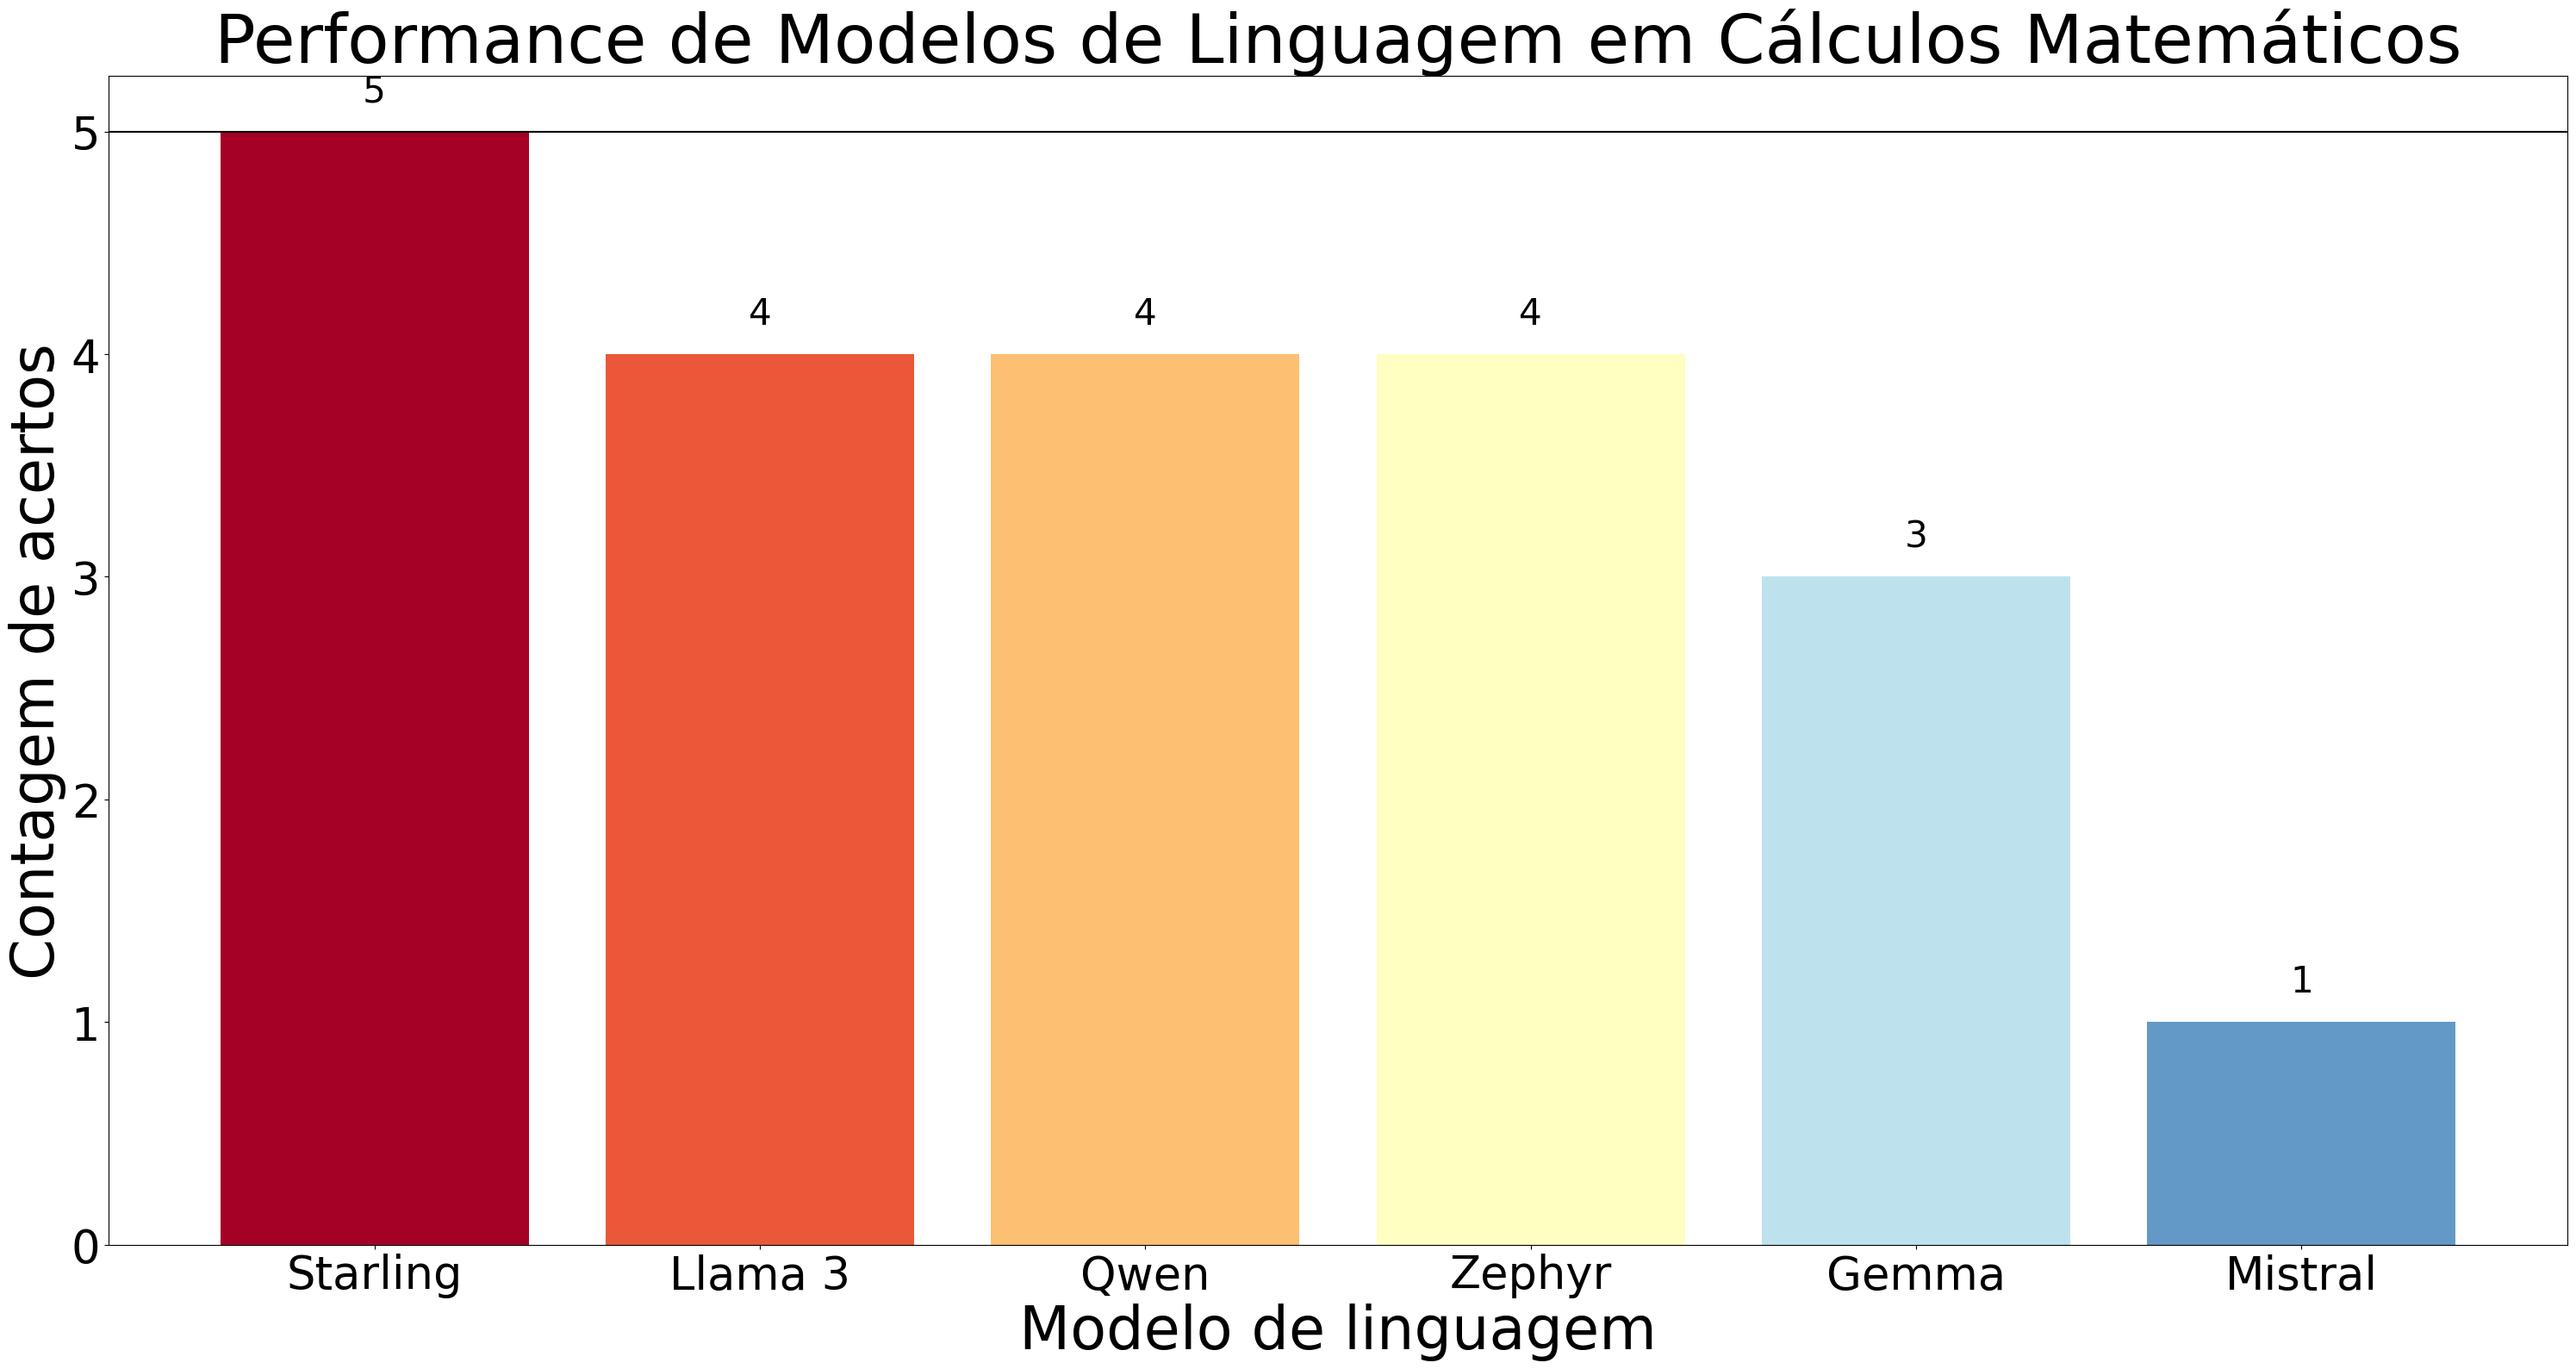

Salvar imagem como:  


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
sortedResults = sorted(results, key = lambda x: x[0], reverse=True)
strings = [i[1] for i in sortedResults]
values = [i[0] for i in sortedResults]
fSize = 38

# Create the figure and axis
fig, ax = plt.subplots(figsize=(30, 16))

# Set up the x-axis labels
ax.set_xticks(range(len(strings)))
ax.set_xticklabels(strings, fontsize=fSize)

# Plot the bars
bars = ax.bar(range(len(values)), values)

# Customize the appearance of the bars
for i, bar in enumerate(bars):
    bar.set_facecolor(plt.cm.RdYlBu(i / len(values)))

# Add title and labels
ax.set_title('Performance de Modelos de Linguagem em Cálculos Matemáticos', fontsize = fSize*1.5)
ax.set_xlabel('Modelo de linguagem', fontsize = fSize*1.3)
ax.set_ylabel('Contagem de acertos', fontsize = fSize*1.3)
ax.tick_params(axis='y', labelsize=fSize)
ax.axhline(y=quant, color=(0, 0, 0))

# Show the value labels on top of each bar
for i, value in enumerate(values):
    ax.text(i, value + 0.1, f'{value}', ha='center', va='bottom', fontsize = fSize*0.8)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

name = input("Salvar imagem como: ")
if name != "":
    fig.savefig(f"exports/{name}")

In [7]:
if demo:
    print("""Avaliação automatizada de precisão de modelos de linguagem em somas matemáticas simples.
    Programado por Augusto Vargas.
    Lista de cálculos:""")
    quant=5
    calcs = [(random.randint(0, 100000), random.randint(0, 100000)) for i in range(quant)]
    trial(models[0])